In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import healpy as hp
from astropy import coordinates
from astropy import units as u
from scipy.ndimage.filters import gaussian_filter

In [3]:
d2r = np.pi / 180.

In [4]:
bank = 'A'
session = '5'
dataf = np.load('/home/mabitbol/GBT-S140/datamaps/tod'+bank+'_'+session+'.npz')
tmask = dataf['tmask']
ras = dataf['ras'][tmask]
decs = dataf['decs'][tmask]
calibrated = dataf['calibrated'][tmask]

tmask2 = ~np.isnan(calibrated)
ras = ras[tmask2]
decs = decs[tmask2]
calibrated = calibrated[tmask2] 

In [5]:
c = coordinates.SkyCoord(frame='icrs', ra=ras*u.degree, dec=decs*u.degree)
lats = c.galactic.b.deg
lons = c.galactic.l.deg

In [6]:
dustmap = hp.read_map('/home/mabitbol/GBT-S140/externaldata/COM_CompMap_Dust-GNILC-Model-Opacity_2048_R2.00.fits')
dustmap = hp.ud_grade(dustmap, 4096)

NSIDE = 2048
ORDERING = RING in fits file


In [23]:
dustmap = hp.read_map('/home/mabitbol/GBT-S140/externaldata/HFI_SkyMap_545-field-Int_2048_R2.02_full.fits')
#dustmap = hp.ud_grade(dustmap, 4096)

NSIDE = 2048
ORDERING = NESTED in fits file
Ordering converted to RING


In [25]:
iris = hp.read_map('/home/mabitbol/GBT-S140/externaldata/IRIS_nohole_4_2048.fits')
#dustmap = hp.ud_grade(dustmap, 4096)

NSIDE = 2048
ORDERING = RING in fits file


/home/mabitbol/.local/lib/python2.7/site-packages/healpy/pixelfunc.py:249: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)


In [26]:
wssa = hp.read_map('/home/mabitbol/GBT-S140/externaldata/wssa_sample_2048.fits')
#dustmap = hp.ud_grade(dustmap, 4096)

NSIDE = 2048
ORDERING = RING in fits file


In [7]:
psource = hp.read_map('/home/mabitbol/GBT-S140/externaldata/LFI_Mask_PointSrc_2048_R2.00.fits')

NSIDE = 2048
ORDERING = NESTED in fits file
Ordering converted to RING


In [23]:
psource = hp.read_map('/home/mabitbol/GBT-S140/externaldata/HFI_Mask_PointSrc_2048_R2.00.fits')
psource = hp.ud_grade(psource, 4096)

NSIDE = 2048
ORDERING = NESTED in fits file
Ordering converted to RING


In [20]:
halpha = hp.read_map('/home/mabitbol/GBT-S140/externaldata/Halpha_fwhm06_1024.fits')
halpha = hp.ud_grade(halpha, 4096)

NSIDE = 1024
ORDERING = NESTED in fits file
Ordering converted to RING


In [8]:
nside = 4096

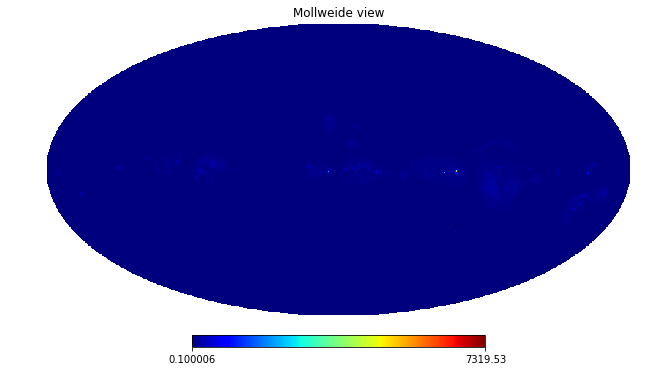

In [9]:
hp.mollview(halpha)

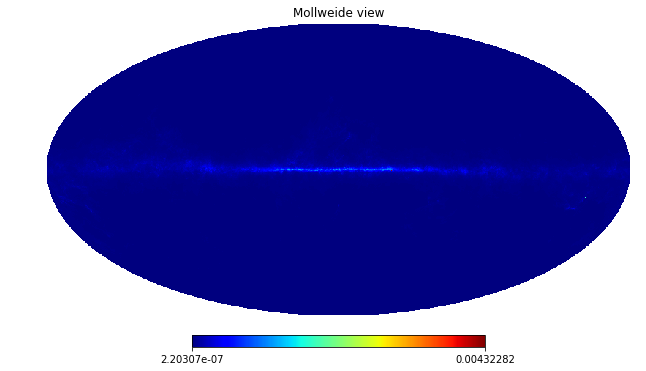

In [10]:
hp.mollview(dustmap)

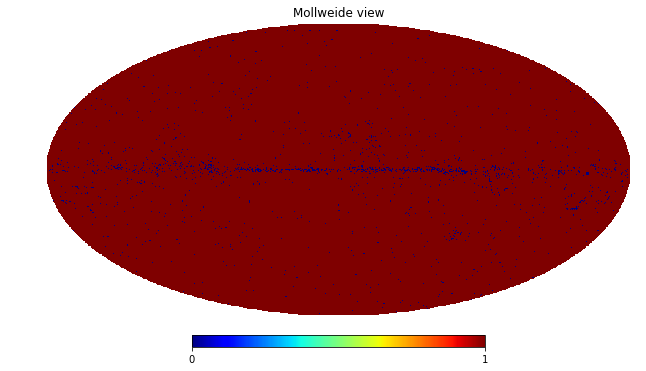

In [17]:
hp.mollview(psource)

In [29]:
lonc = 107.2
latc = 5.2
lonra = [lons.min(), lons.max()]
latra = [lats.min(), lats.max()]
lonra2 = [lonc-4, lonc+4]
latra2 = [latc-4, latc+4]

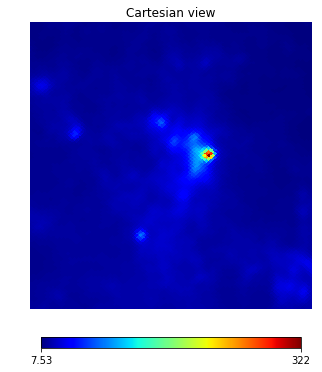

In [44]:
x = hp.cartview(dustmap, lonra=lonra, latra=latra, return_projected_map=True)
fig = gcf()

In [48]:
ax = fig.axes[0]

In [53]:
lonra

[105.74534025062628, 108.64824459896158]

In [52]:
ax.get_xlim()

(-108.64824459896158, -105.74534025062628)

In [54]:
ax.get_ylim()

(3.7224089900461834, 6.6793296655618217)

In [62]:
img = ax.images[0]

In [65]:
x

masked_array(data =
 [[ 16.0942955   16.31139946  16.31139946 ...,  18.84091187  18.84091187
   18.84091187]
 [ 16.0942955   16.0942955   16.0942955  ...,  18.84091187  18.84091187
   18.84091187]
 [ 16.0942955   16.0942955   16.0942955  ...,  18.84091187  18.84091187
   18.84091187]
 ..., 
 [  9.7688694    9.7688694    9.7688694  ...,  10.83153057  10.83153057
   10.83153057]
 [  9.7688694    9.7688694    9.7688694  ...,  10.53728867  10.83153057
   10.83153057]
 [  9.76860523   9.7688694    9.7688694  ...,  10.53728867  10.53728867
   10.83153057]],
             mask =
 False,
       fill_value = -1.6375e+30)

In [68]:
img.get_extent()

(-108.64824459896158,
 -105.74534025062628,
 3.7224089900461834,
 6.6793296655618217)

In [64]:
img.get_array()

masked_array(data =
 [[ 16.0942955   16.31139946  16.31139946 ...,  18.84091187  18.84091187
   18.84091187]
 [ 16.0942955   16.0942955   16.0942955  ...,  18.84091187  18.84091187
   18.84091187]
 [ 16.0942955   16.0942955   16.0942955  ...,  18.84091187  18.84091187
   18.84091187]
 ..., 
 [  9.7688694    9.7688694    9.7688694  ...,  10.83153057  10.83153057
   10.83153057]
 [  9.7688694    9.7688694    9.7688694  ...,  10.53728867  10.83153057
   10.83153057]
 [  9.76860523   9.7688694    9.7688694  ...,  10.53728867  10.53728867
   10.83153057]],
             mask =
 False,
       fill_value = -1.6375e+30)

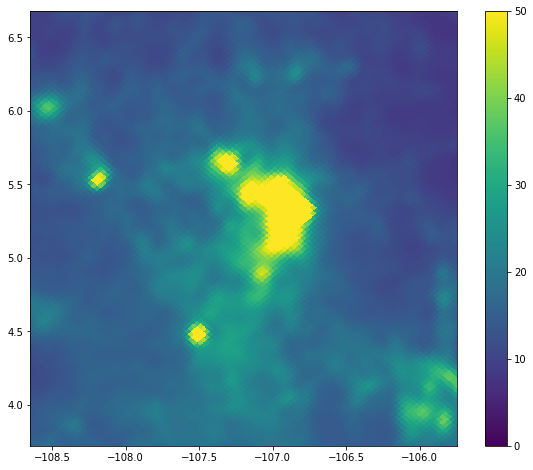

In [77]:
figsize(10, 8)
imshow(x, extent=img.get_extent(), origin='lower')
colorbar()
clim(0, 50)

In [78]:
x.shape

(815, 800)

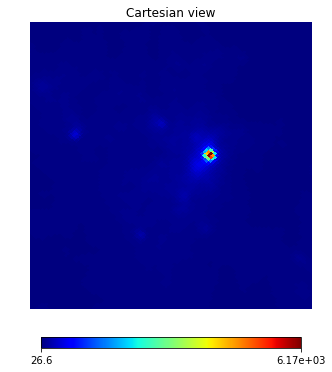

In [39]:
x = hp.cartview(iris, lonra=lonra, latra=latra, return_projected_map=True)

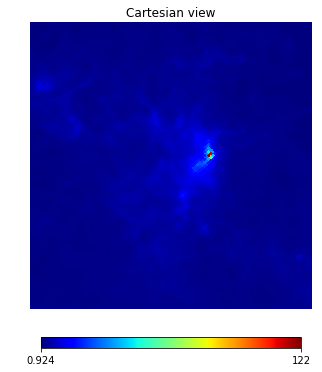

In [41]:
x = hp.cartview(wssa, lonra=lonra, latra=latra, return_projected_map=True)

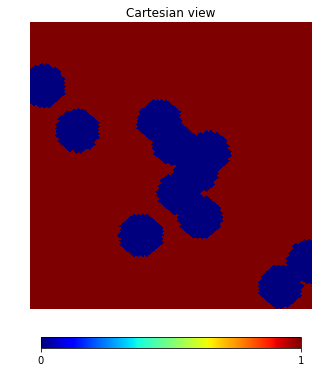

In [26]:
x = hp.cartview(psource, lonra=lonra, latra=latra, return_projected_map=True)

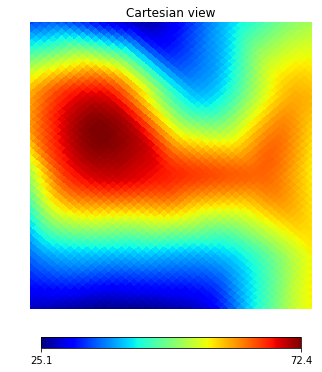

In [13]:
x = hp.cartview(halpha, lonra=lonra, latra=latra, return_projected_map=True)

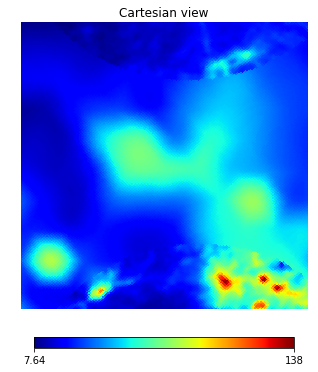

In [22]:
x = hp.cartview(halpha, lonra=lonra2, latra=latra2, return_projected_map=True)

In [14]:
# get pixels and turn pixels into pointing
# or turn our pointing into healpy pixels...

In [15]:
# weird test

In [16]:
npix = hp.nside2npix(nside)
x = np.arange(npix)

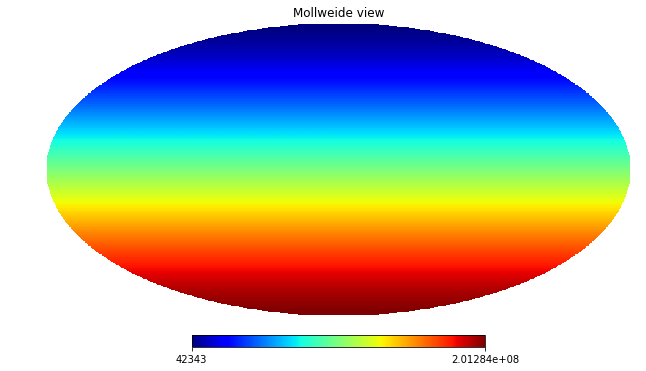

In [17]:
hp.mollview(x)

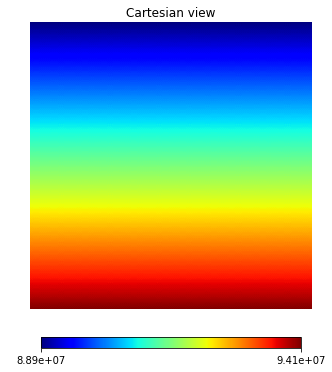

In [18]:
xmap = hp.cartview(x, lonra=lonra, latra=latra, return_projected_map=True)

In [32]:
pixels = np.unique(xmap.data).astype(int)

In [35]:
cdust = np.zeros_like(psource)
cdust[pixels] = psource[pixels]

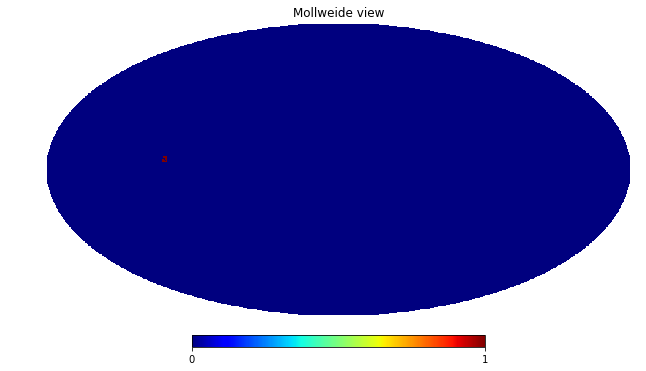

In [36]:
hp.mollview(cdust)

In [37]:
theta, phi = hp.pix2ang(nside, pixels)

In [38]:
dustlats = 90. - theta / d2r
dustlons = phi / d2r

In [39]:
dustlats

array([ 6.68286418,  6.68286418,  6.68286418, ...,  3.7141437 ,
        3.7141437 ,  3.7141437 ])

In [40]:
dustlons

array([ 105.75439453,  105.77636719,  105.79833984, ...,  108.59985352,
        108.62182617,  108.64379883])

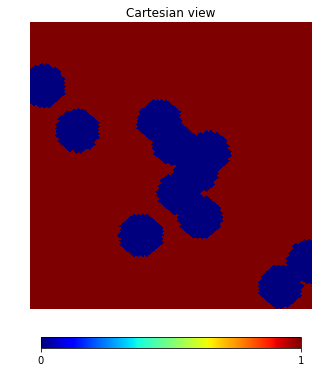

In [41]:
x = hp.cartview(cdust, lonra=lonra, latra=latra, return_projected_map=True)

In [42]:
dustdata = cdust[pixels]

In [43]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p.T, hits.T, ra_bins, dec_bins

In [44]:
nlonpix = int((dustlons.max() - dustlons.min()) / (2. / 60.))
ndecpix = int((dustlats.max() - dustlats.min()) / (2. / 60.))

In [45]:
datamap, hits, lonbins, latbins = naive_map(dustdata, dustlons, dustlats, nlonpix, ndecpix)

In [46]:
mask = hits == 0 
signal = np.zeros_like(datamap)
signal[~mask] = datamap[~mask] / hits[~mask]
smth = gaussian_filter(signal, 1.)
shits = gaussian_filter(hits, 1.)
signal[mask] = np.nan
smth[shits < 1] = np.nan

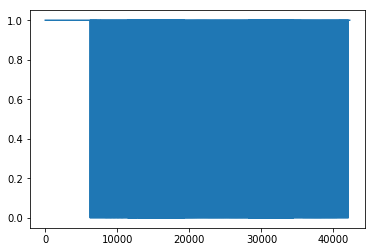

In [47]:
plot(dustdata)

In [48]:
z = {'lons': lonbins, 'lats': latbins, 'signal': signal}

In [49]:
#np.savez('../externaldata/dustdata_gridded', **z)

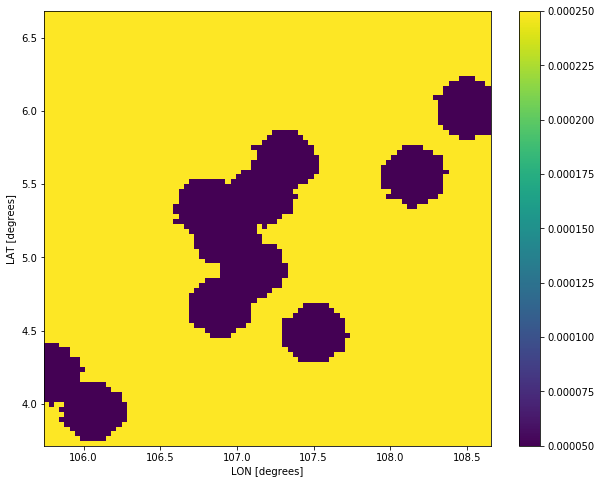

In [50]:
figure(figsize=(10, 8))
pc = pcolormesh(lonbins, latbins, signal)
clim(0.00005, 0.00025)
cb = colorbar()
xlabel('LON [degrees]')
ylabel('LAT [degrees]')
#savefig('figures/dustmap_regrid')

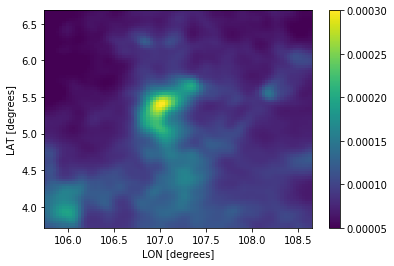

In [73]:
figure()
pc = pcolormesh(lonbins, latbins, smth)
clim(0.00005, 0.0003)
cb = colorbar()
xlabel('LON [degrees]')
ylabel('LAT [degrees]')